Saving oral_cancer_prediction_dataset.csv to oral_cancer_prediction_dataset (1).csv

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    160292 non-null  int64  
 1   Country               160292 non-null  object 
 2   Gender                160292 non-null  object 
 3   Age                   160292 non-null  int64  
 4   Tobacco_Use           160292 non-null  int64  
 5   Alcohol_Use           160292 non-null  int64  
 6   Socioeconomic_Status  160292 non-null  object 
 7   Diagnosis_Stage       160292 non-null  object 
 8   Treatment_Type        160292 non-null  object 
 9   Survival_Rate         160292 non-null  float64
 10  HPV_Related           160292 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.5+ MB
None
                  ID            Age   

<ipython-input-2-85494154ab9d>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-2-85494154ab9d>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

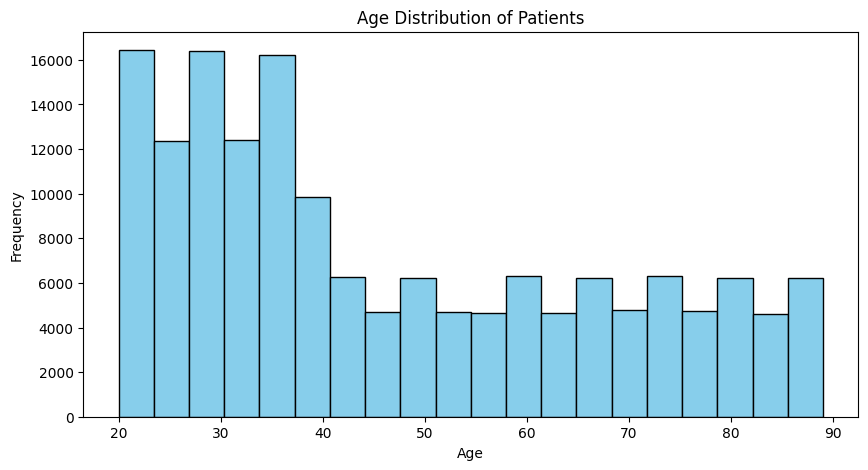

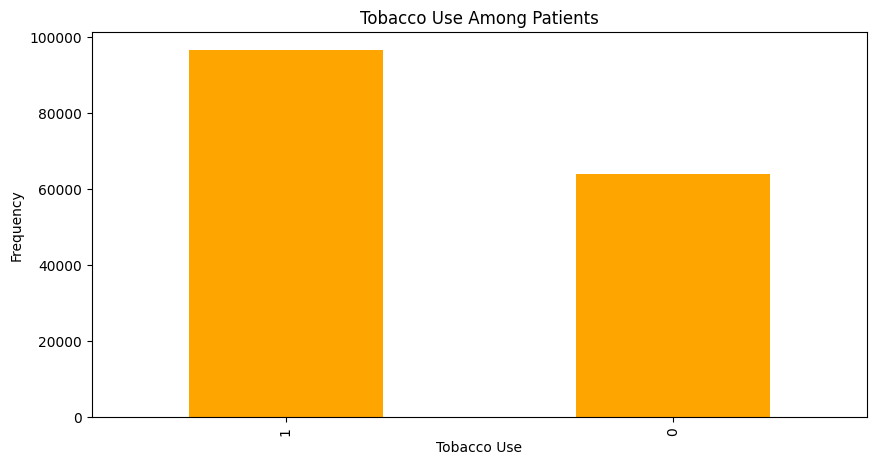

<ipython-input-2-85494154ab9d>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


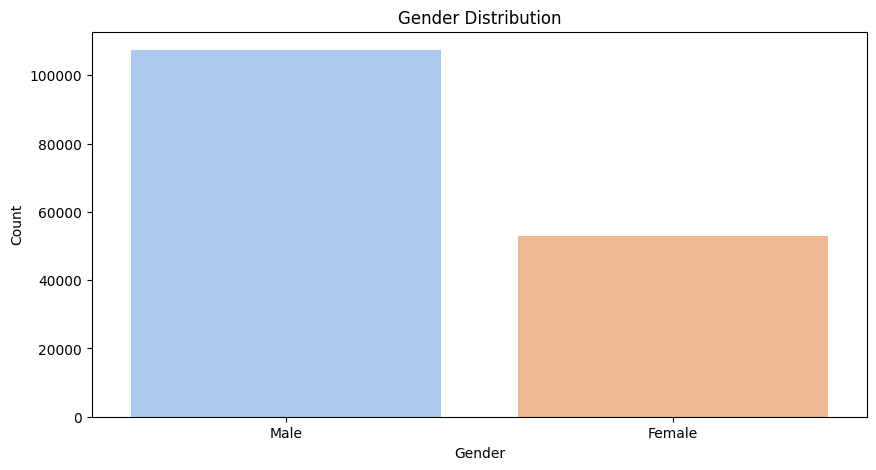

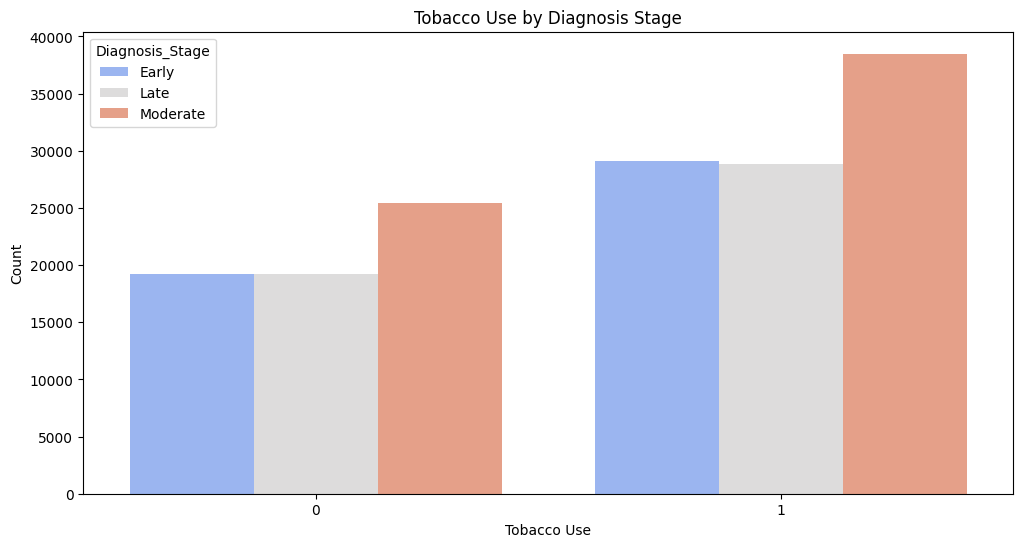

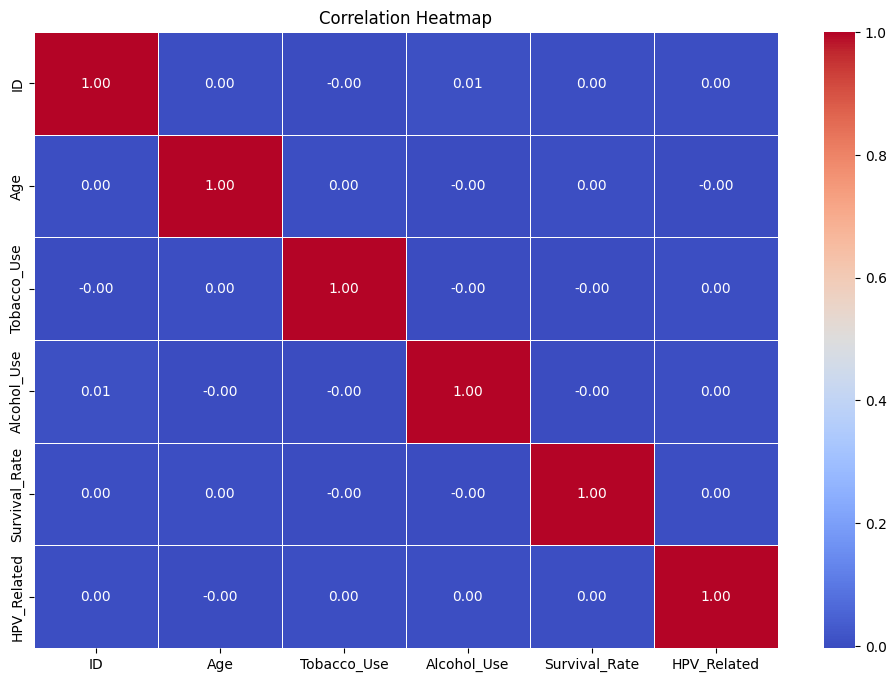

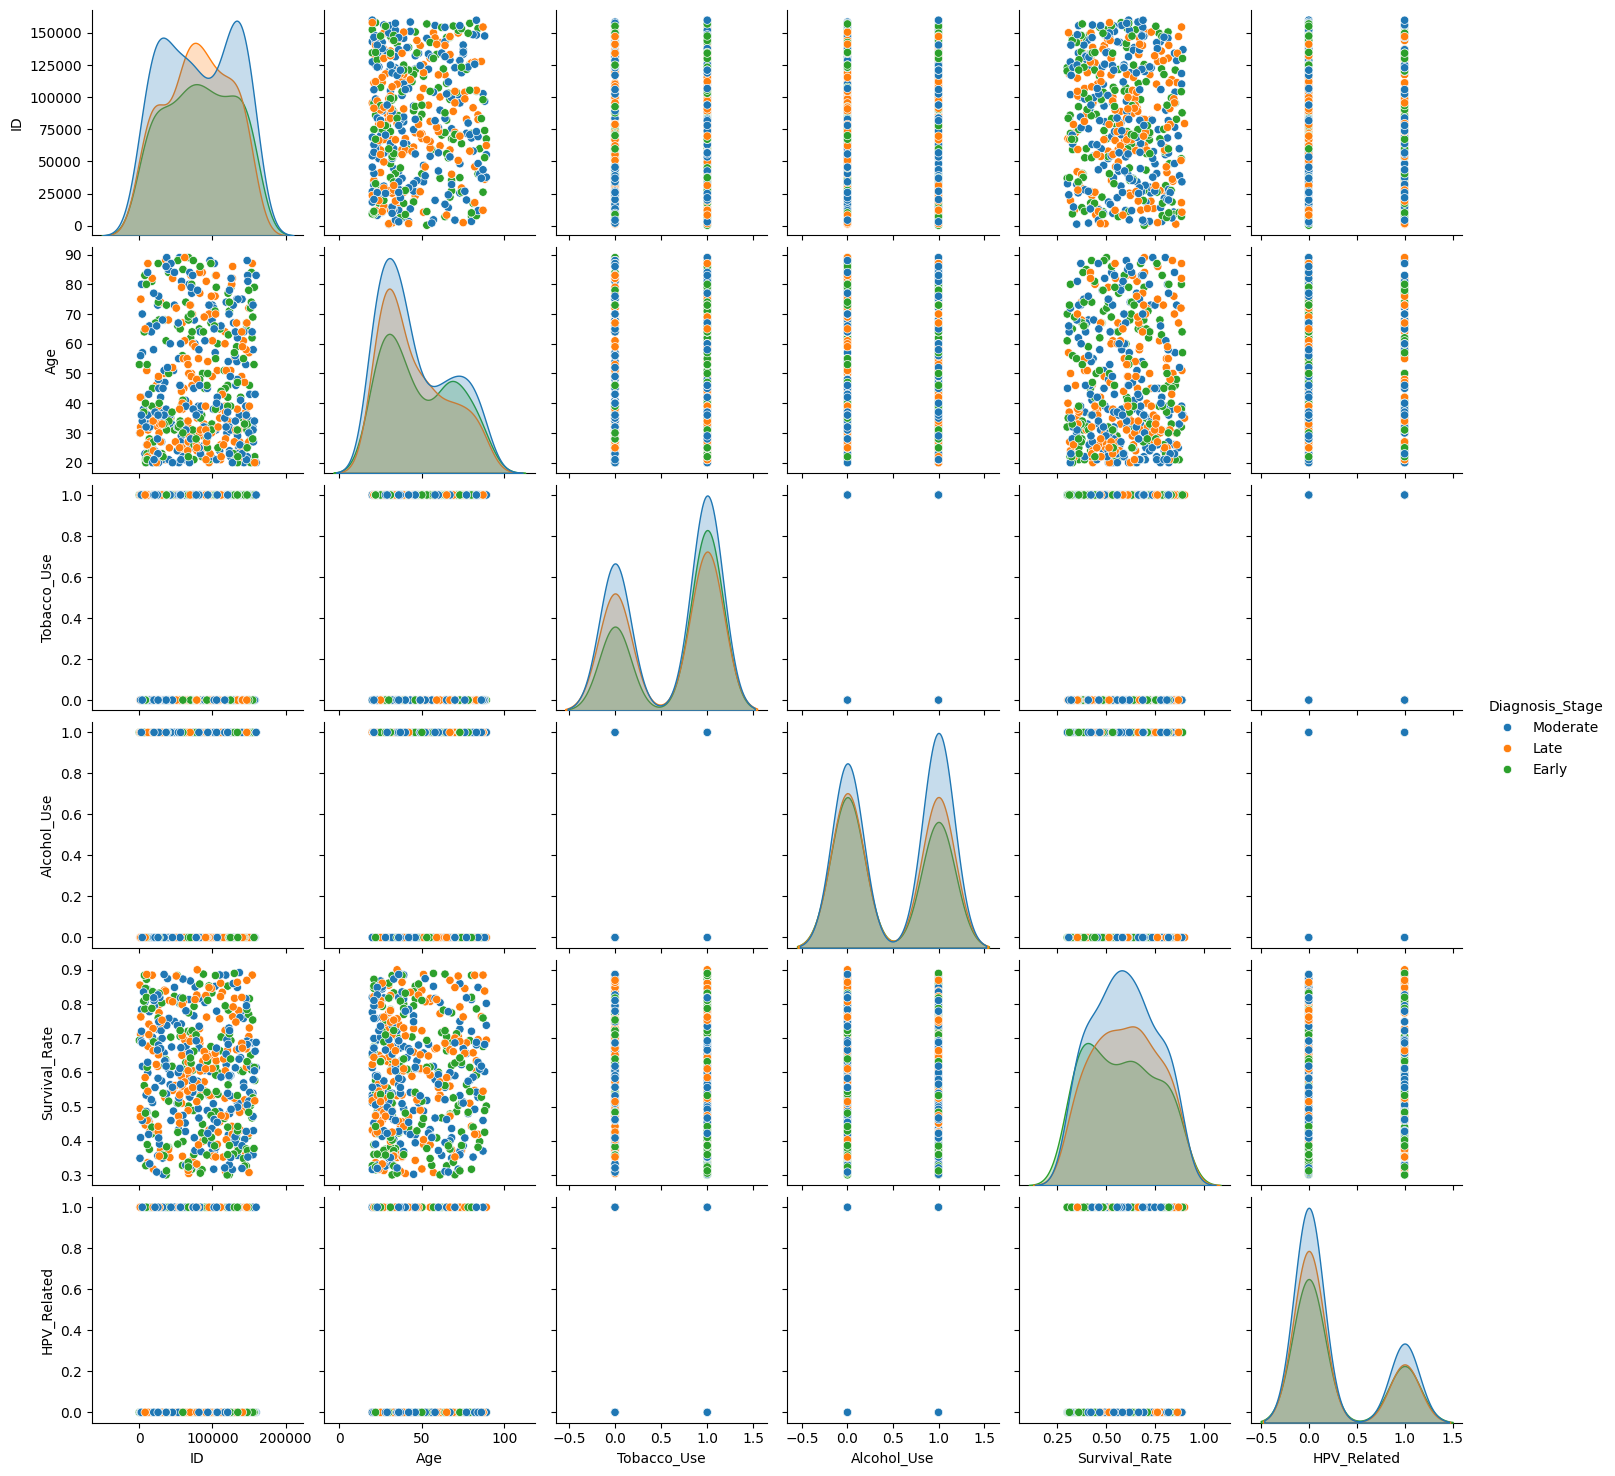


Model Accuracy: 34.96%

--- Classification Report ---
              precision    recall  f1-score   support

       Early       0.31      0.25      0.27      9788
        Late       0.30      0.24      0.26      9638
    Moderate       0.39      0.52      0.45     12633

    accuracy                           0.35     32059
   macro avg       0.33      0.33      0.33     32059
weighted avg       0.34      0.35      0.34     32059


--- Confusion Matrix ---


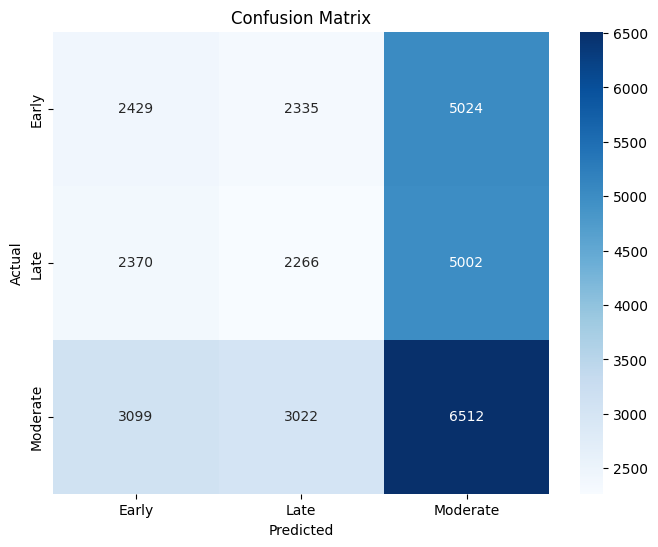

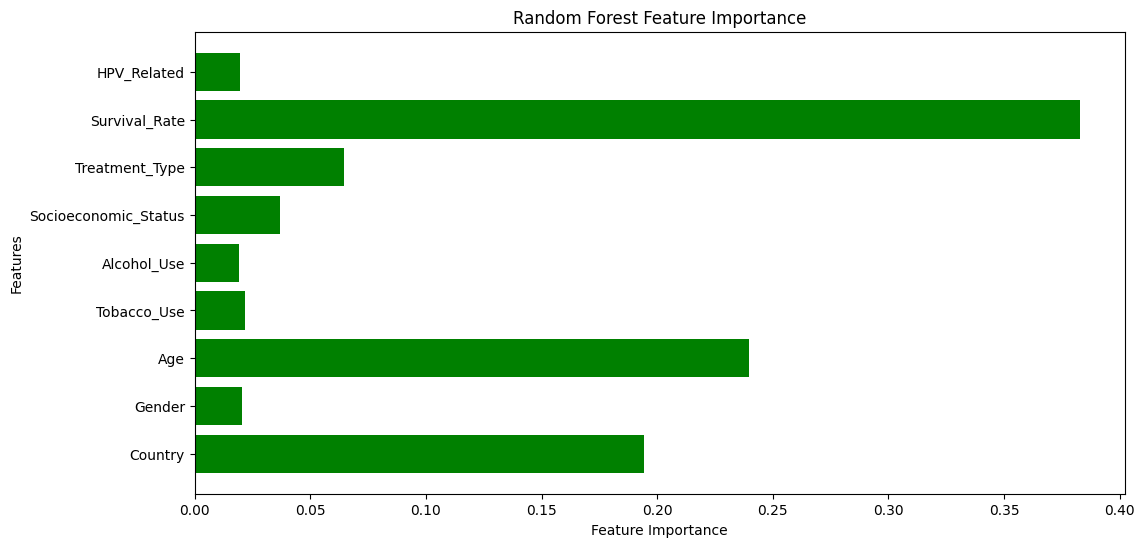


Cross-Validation Accuracy: 35.14% ± 0.19%


In [2]:

from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Upload and load data
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

#  Display basic info
print("\n--- Data Overview ---")
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values
# Fill numeric columns with median and categorical columns with mode
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#  Data visualization


# 1️⃣ **Age Distribution**
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2️⃣ **Tobacco Use Distribution**
plt.figure(figsize=(10, 5))
df['Tobacco_Use'].value_counts().plot(kind='bar', color='orange')
plt.title('Tobacco Use Among Patients')
plt.xlabel('Tobacco Use')
plt.ylabel('Frequency')
plt.show()

# 3️⃣ **Gender Distribution**
if 'Gender' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Gender', data=df, palette='pastel')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

# 4️⃣ **Smoking vs. Diagnosis Stage**
if 'Tobacco_Use' in df.columns and 'Diagnosis_Stage' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Tobacco_Use', hue='Diagnosis_Stage', data=df, palette='coolwarm')
    plt.title('Tobacco Use by Diagnosis Stage')
    plt.xlabel('Tobacco Use')
    plt.ylabel('Count')
    plt.show()

# 5️⃣ **Correlation Heatmap**
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 6️⃣ **Pairplot (sample only, to avoid overload)**
sample_df = df.sample(min(500, len(df)))  # Sample only 500 rows for readability
sns.pairplot(sample_df, hue='Diagnosis_Stage', diag_kind='kde')
plt.show()

# ✅ Prepare data for modeling
target_column = 'Diagnosis_Stage'

if target_column not in df.columns:
    print(f"Available columns: {df.columns.tolist()}")
    raise KeyError(f"Target column '{target_column}' not found in the DataFrame.")

# Features and target separation
X = df.drop([target_column, 'ID'], axis=1, errors='ignore')
y = df[target_column]

# Encode categorical variables
encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train and evaluate the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')

# Detailed evaluation
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Feature Importance Visualization
importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Cross-validation for stability
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f'\nCross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%')
